# Importación de Librerías

In [1]:
import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt


# Lectura y Despliegue de Imagen

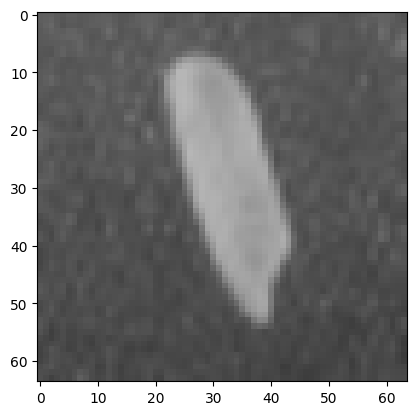

In [3]:
img = imread('onerice.bmp')
plt.imshow(img)
plt.show()

# Función de cómo es la imagen

In [4]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

howis(img)

size =  (64, 64, 3)
max  =  183
min  =  59


# Selección del primer canal de la imagen

size =  (64, 64)
max  =  183
min  =  59


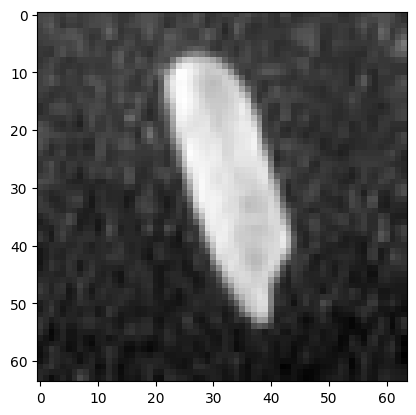

In [5]:
X = img[:,:,0]
howis(X)
plt.imshow(X,cmap='gray')
plt.show()

# Función de Segmentación por Umbral

In [8]:
def segmenta(X,t):
  (N,M) = X.shape
  Y = np.zeros((N,M))
  area = 0
  for i in range(N):
    for j in range(M):
      if X[i,j] > t:
        Y[i,j] = 255
        area = area + 1
  print('area = ',area)
  return Y


# Segmentación

area =  597
size =  (64, 64)
max  =  255.0
min  =  0.0


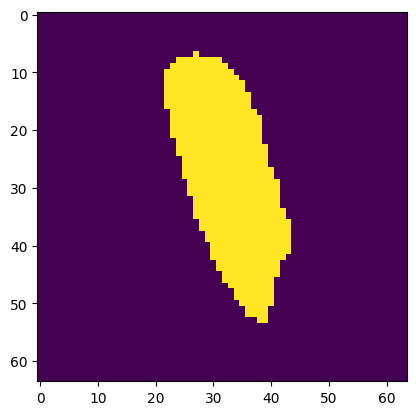

In [9]:
Y = segmenta(X,120) #una buen umbral es 120
howis(Y)
plt.imshow(Y)
plt.show()

# Un ejemplo más complejo

size =  (512, 512)
max  =  207
min  =  38


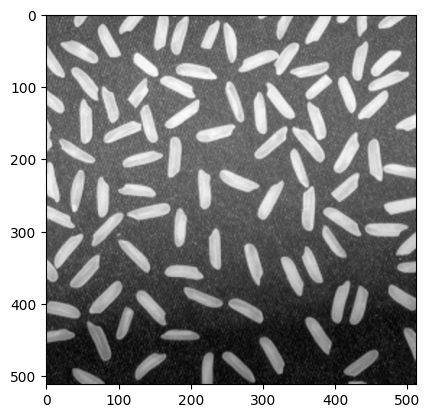

In [10]:
img = imread('rices.png')
X   = img[:,:,0]
howis(X)
plt.imshow(X,cmap='gray')
plt.show()

Como el fondo no tiene iluminación constante, entonces un umbral global para toda la imagen no funciona bien.

Probar con 90, 110, 130 y 150

area =  68447


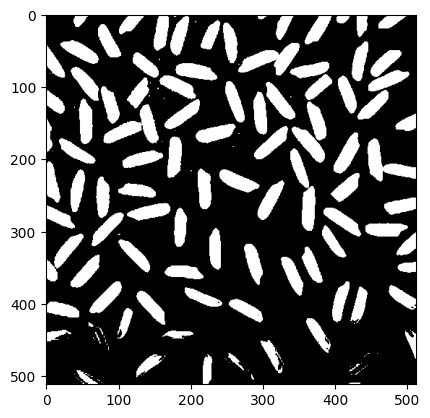

In [16]:
Y = segmenta(X,130)
plt.imshow(Y,cmap='gray')
plt.show()

# Definición de imagen con fondo homogéneo

A cada fila se le resta el mínimo.

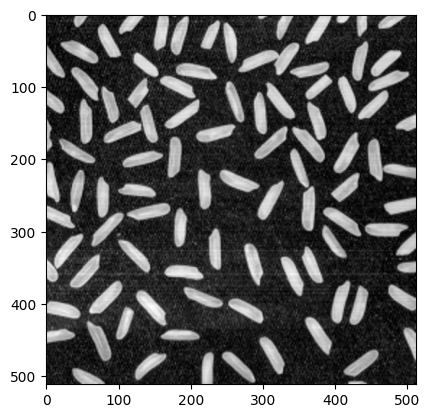

In [17]:
# Basicamente esto lo que hace es oscurecer la imagen para que sea mas facil de detectar
(N,M) = X.shape
Xm    = np.zeros((N,M),np.uint8)
for i in range(N):
  xmin = np.min(X[i,:])
  Xm[i,:] = X[i,:] - xmin
plt.imshow(Xm,cmap='gray')
plt.show()

area =  68445


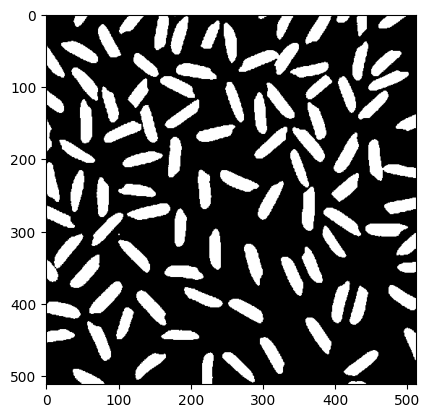

In [20]:
Y = segmenta(Xm,60)
plt.imshow(Y,cmap='gray')
plt.show()